In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import pickle
import string
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#reading csv
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#dropping unncessary coulmns and renaming coulmns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df=df.rename(columns={'v1':'label'})
df=df.rename(columns={'v2':'body_text'})
df.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape  ### Return the shape of data 

(5572, 2)

In [5]:
df.isnull().sum()  ### Returns the sum fo all na values

label        0
body_text    0
dtype: int64

In [6]:
df.info()  ### Give concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   body_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


([<matplotlib.axis.XTick at 0x2780676aca0>,
 [Text(0, 0, 'Non spam'), Text(0, 0, 'spam')])

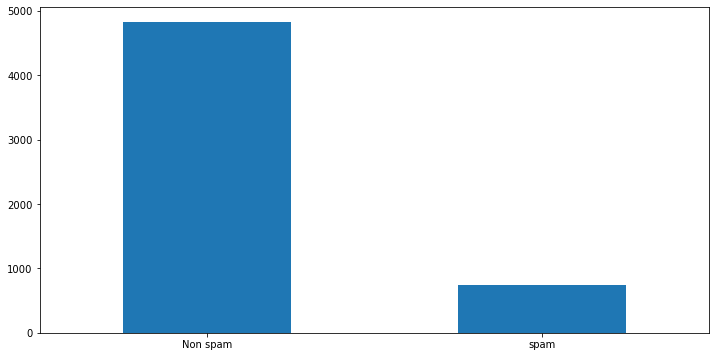

In [7]:
#visualizing the count of both the categories in the column
df["label"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0)

In [8]:
#creating new coulumns for visulization

#body_len: length of body text excluding spaces
df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))

# punct%: percentage of punctuation in the body text
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

df['punct%'] = df['body_text'].apply(lambda x: count_punct(x))

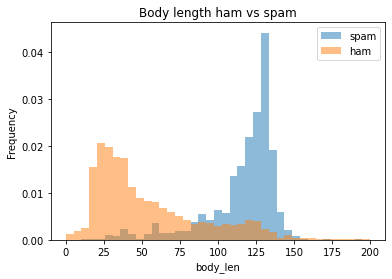

In [9]:
bins = np.linspace(0, 200, 40)
df.loc[df['label'] == 'spam', 'body_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'spam')
df.loc[df['label'] == 'ham', 'body_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'ham')
plt.legend(loc = 'best')
plt.xlabel("body_len")
plt.title("Body length ham vs spam")
plt.show()

__spam messages have a longer body length i.e. contain more words compared to ham messages.__

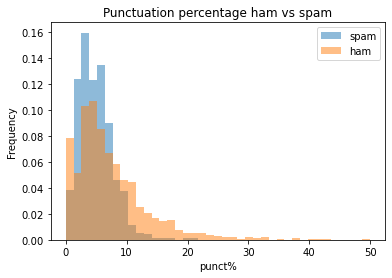

In [10]:
bins = np.linspace(0, 50, 40)
df.loc[df['label'] == 'spam', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'spam')
df.loc[df['label'] == 'ham', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'ham')
plt.legend(loc = 'best')
plt.xlabel("punct%")
plt.title("Punctuation percentage ham vs spam")
plt.show()

__ham messages appear to have a longer tail i.e. ham messages tend to have a higher punctuation percentage.__

In [11]:
#cleaning the data
corpus = []
length = len(df)
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["body_text"][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    stopword = stopwords.words("english")
    text = [ps.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)
print(corpus)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun', 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour', 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info', 'urgent 1 week free membership 100 

In [12]:
df.drop(['body_len','punct%'],axis=1,inplace=True)

In [13]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
pickle.dump(cv, open('transformer.pkl', 'wb')) ## saving to into transformer.pkl file

X = cv.fit_transform(corpus).toarray()

words = cv.get_feature_names()
pickle.dump(words,open('vocabulary.pkl','wb')) ## saving to into vocabulary.pkl file

y=df['label']

In [14]:
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [15]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

In [17]:
# Fitting MultinomialNB to the Training set
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

#Training accuracy
print('Training:', nb.score(X_train,y_train))

y_pred_nb=nb.predict(X_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_nb))

print('f1score:',f1_score(y_test,y_pred_nb,pos_label='spam'))

print('precision score:',precision_score(y_test,y_pred_nb,pos_label='spam'))

print('recall score:',recall_score(y_test,y_pred_nb,pos_label='spam'))

Training: 0.9932690150325331
Testing: 0.97847533632287
f1score: 0.92
precision score: 0.92
recall score: 0.92


In [18]:
# Fitting LogisticRegression to the Training set
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

#Training accuracy
print('Training:', lr.score(X_train,y_train))

y_pred_lr=lr.predict(X_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_lr))

print('f1score:',f1_score(y_test,y_pred_lr,pos_label='spam'))

print('precision score:',precision_score(y_test,y_pred_lr,pos_label='spam'))

print('recall score:',recall_score(y_test,y_pred_lr,pos_label='spam'))

Training: 0.9968588736818488
Testing: 0.979372197309417
f1score: 0.9169675090252708
precision score: 1.0
recall score: 0.8466666666666667


In [19]:
# Fitting SVC to the Training set
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

#Training accuracy
print('Training:', svc.score(X_train,y_train))

y_pred_svc=svc.predict(X_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_svc))

print('f1score:',f1_score(y_test,y_pred_svc,pos_label='spam'))

print('precision score:',precision_score(y_test,y_pred_svc,pos_label='spam'))

print('recall score:',recall_score(y_test,y_pred_svc,pos_label='spam'))

Training: 0.997083239847431
Testing: 0.9766816143497757
f1score: 0.9051094890510949
precision score: 1.0
recall score: 0.8266666666666667


In [20]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Training accuracy
print('Training:',rf.score(X_train,y_train))

y_pred_rf=rf.predict(X_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_rf))

print('f1score:',f1_score(y_test,y_pred_rf,pos_label='spam'))

print('precision score:',precision_score(y_test,y_pred_rf,pos_label='spam'))

print('recall score:',recall_score(y_test,y_pred_rf,pos_label='spam'))

Training: 1.0
Testing: 0.9757847533632287
f1score: 0.9018181818181817
precision score: 0.992
recall score: 0.8266666666666667


In [21]:
# Fitting GradientBoostingClassifier to the Training set
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)

# Fit model
gb.fit(X_train, y_train)

#Training accuracy
print('Training:',gb.score(X_train,y_train))

# Predict 
y_pred_gb = gb.predict(X_test)

#Testing accuracy
print('Testing:',accuracy_score(y_test,y_pred_gb))

print('f1score:',f1_score(y_test,y_pred_gb,pos_label='spam'))

print('precision score:',precision_score(y_test,y_pred_gb,pos_label='spam'))

print('recall score:',recall_score(y_test,y_pred_gb,pos_label='spam'))

Training: 0.983396903746915
Testing: 0.9695067264573991
f1score: 0.873134328358209
precision score: 0.9915254237288136
recall score: 0.78


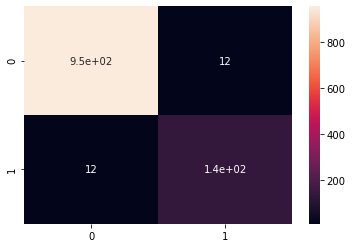

In [22]:
cm=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm, annot=True)

In [23]:
#dumping the model
pickle.dump(nb, open("model.pkl", "wb"))

In [24]:
loaded_model = pickle.load(open("model.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.97847533632287

In [25]:
#custom testing
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred

new_review = new_review(str(input("Enter new review...")))
new_review

Enter new review...hii what is your name


array(['ham'], dtype='<U4')

In [26]:
if new_review[0]==1:
    print("SPAM")
else:
    print("NOT SPAM")

NOT SPAM
